In [75]:
#All Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [76]:
#Load Data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [77]:
test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


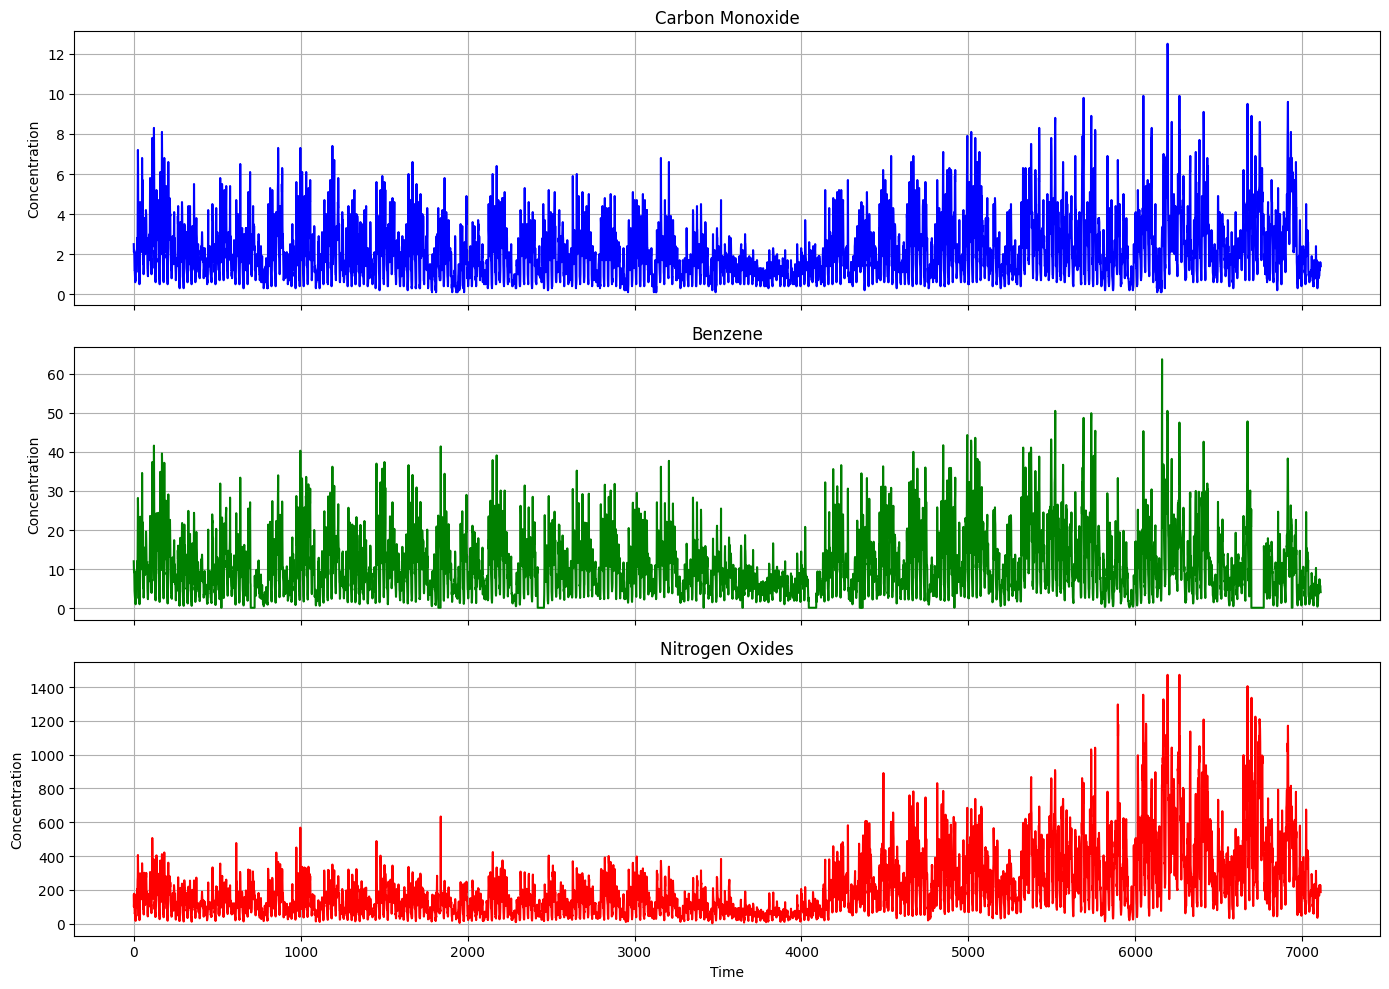

In [78]:
#Explore Data
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

train['target_carbon_monoxide'].plot(ax=axs[0], color='blue', title='Carbon Monoxide')
train['target_benzene'].plot(ax=axs[1], color='green', title='Benzene')
train['target_nitrogen_oxides'].plot(ax=axs[2], color='red', title='Nitrogen Oxides')

for ax in axs:
    ax.set_ylabel('Concentration')
    ax.grid(True)

axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()

In [79]:
#Prepare Data
test_dates = test['date_time']
y = train[['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]
X = train.drop(columns=['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'], axis=1)
test = test.drop('date_time', axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
rf = RandomForestRegressor(n_estimators=100, random_state=142)
multi_rf = MultiOutputRegressor(rf)

In [82]:
#Train Model
multi_rf.fit(X_train, y_train)

,estimator,RandomForestR...dom_state=142)
,n_jobs,None
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [83]:
y_pred = multi_rf.predict(X_test)

In [84]:
#Evaluate predictions based on RMSLE
for i, col in enumerate(y.columns):
    # Clip predictions to 0 to avoid log error
    y_true = np.maximum(0, y_test[col])
    y_pred_col = np.maximum(0, y_pred[:, i])
    
    msle = mean_squared_log_error(y_true, y_pred_col)
    rmsle = np.sqrt(msle)
    
    print(f'RMSLE for {col}: {rmsle:.4f}')

RMSLE for target_carbon_monoxide: 0.1345
RMSLE for target_benzene: 0.0936
RMSLE for target_nitrogen_oxides: 0.3297


In [85]:
y_pred = multi_rf.predict(test)

In [86]:
submission = pd.DataFrame(y_pred, columns=['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
submission['date_time'] = test_dates
submission = submission[['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]
submission.to_csv('../submission/submission.csv', index=False)